In [17]:
import random
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict, List

In [18]:
class State(TypedDict):
    name: str
    numbers: List[int]
    counter: int

In [33]:
def greetin_node(state: State) -> State:
    """A node that greets the user by name."""
    print(f"Hello, {state['name']}!")
    state['counter'] = 0  # Initialize counter
    return state

def add_random_number_node(state: State) -> State:
    """A node that adds a random number to the list."""
    state['numbers'].append(random.randint(1, 10))
    state['counter'] += 1  # Increment counter
    return state

def check_counter_node(state: State) -> State:
    """A node that checks if the counter has reached 5."""
    if state['counter'] < 5:
        return "loop"
    else:
        return "exit"

In [ ]:
# greetin_node -> add_random_number_node -> check_counter_node -> add_random_number_node (loop back to add_random_number_node until counter reaches 5) -> END

graph_builder = StateGraph(State)
graph_builder.add_node("greetin_node", greetin_node)
graph_builder.add_node("add_random_number_node", add_random_number_node)

graph_builder.add_edge(START, "greetin_node")
graph_builder.add_edge("greetin_node", "add_random_number_node")
graph_builder.add_conditional_edges(
    "add_random_number_node",              # source node
    check_counter_node, {                  # action to determine next node
        "loop": "add_random_number_node",  # if check_counter_node returns "loop", go back to add_random_number_node
        "exit": END                        # if check_counter_node returns "exit", go to END
})

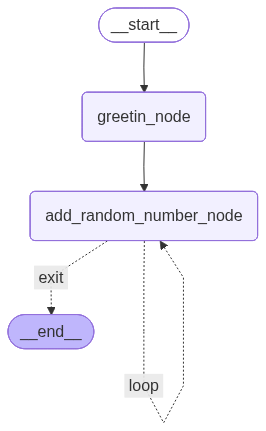

In [35]:
from IPython.display import Image, display
app = graph_builder.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
init_state = State(name="Alice", numbers=[])

result = app.invoke(init_state)
print(f"Final State: {result}")

Hello, Alice!
Final State: {'name': 'Alice', 'numbers': [5, 3, 3, 6, 10], 'counter': 5}
